## Convolutional Neural Network

### Libraries

In [3]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print("GPUS: ", tf.config.list_physical_devices('GPU'))

2024-03-20 21:41:39.744229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 21:41:43.113320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPUS:  []


2024-03-20 21:41:45.695060: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-20 21:41:45.827532: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Data Loading

In [4]:
X = np.load('archive/X_2024-03-18_18-10-54.npy')
y = np.load('archive/Y_2024-03-18_18-10-54.npy')

### Splitting Train (70%), Validation (15%) and Test Datasets (15%)

In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

x_train = x_train.reshape(-1, 64, 64, 1)
x_val = x_val.reshape(-1, 64, 64, 1)
x_test = x_test.reshape(-1, 64, 64, 1)

### Creating the CNN Model

In [6]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

/home/jakerosa/Desktop/Uni/3ano_2semestre/TAA/TAA-1-Project/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Summary of the Model

In [7]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,978 (621.01 KB)

 Trainable params: 158,978 (621.01 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [8]:
CNN_model.compile(optimizer=Adam(learning_rate=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

### Training

In [9]:
results = CNN_model.fit(x_train, y_train, epochs=70, validation_data=(x_val,y_val))

Epoch 1/70


 8/46 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.1246 - loss: 2.3047

KeyboardInterrupt: 

### Plotting Training and Validating Accuracy/Loss

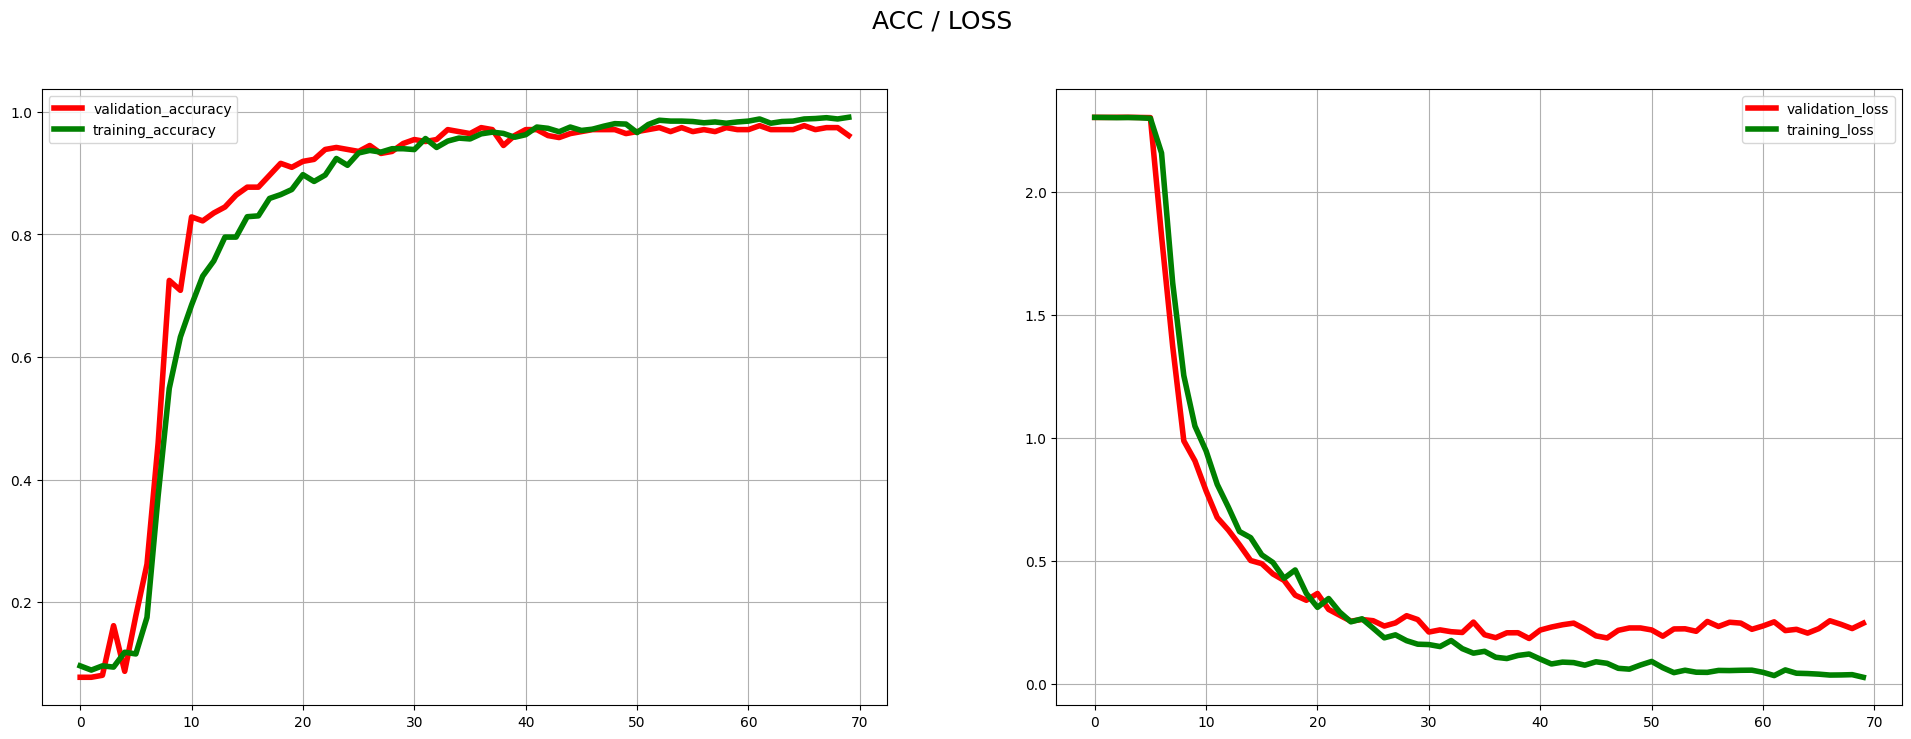

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

Based on the accuracy and loss plots, the neural network model is effectively learning from the training data and is also generalizing well to the validation data. There are no significant signs of overfitting, as the training and validation metrics are closely tracking each other.

### Test Accuracy/Loss

In [ ]:
CNN_model.evaluate(x_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9695 - loss: 0.2674


[0.1778746247291565, 0.9741935729980469]

### Confusion Matrix

In [ ]:
y_pred = CNN_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

NameError: name 'CNN_model' is not defined

### Predictions

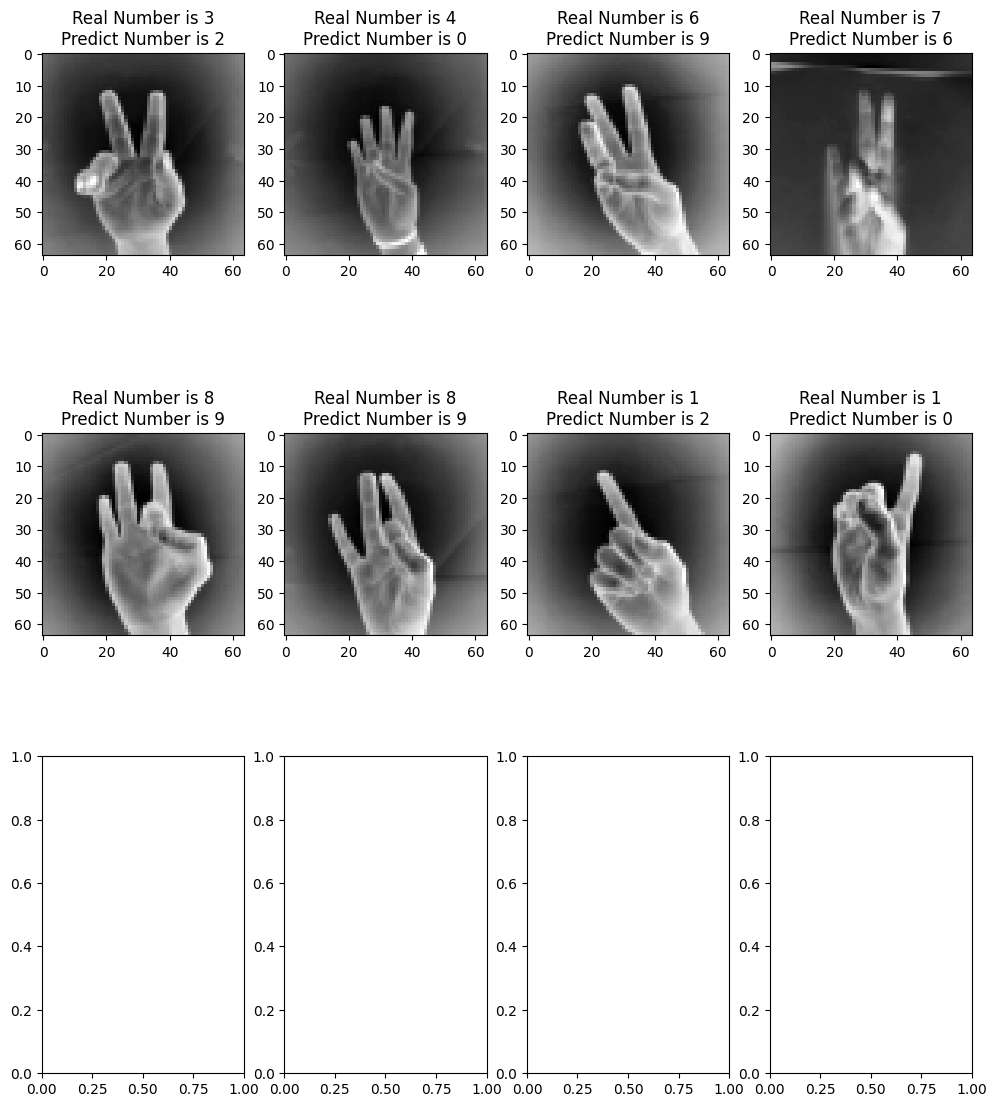

In [ ]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(10, 5, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"True: {y_test[i].argmax()} Pred: {y_pred[i].argmax()}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(hspace=0.6)
plt.show()